# Collate Results

In [2]:
import os
import re

# Directory containing the simulation output files
directory = '/Volumes/RahulT7Shield/Assign2_1_DONE/results_200M'  # Replace with the actual path to your files

# Ordered list of traces (as per your bash script)
traces = [
    "603.bwaves_s-3699B.champsimtrace.xz",
    "648.exchange2_s-1699B.champsimtrace.xz",
    "638.imagick_s-10316B.champsimtrace.xz",
    "644.nab_s-5853B.champsimtrace.xz",
    "627.cam4_s-573B.champsimtrace.xz",
    "600.perlbench_s-210B.champsimtrace.xz",
    "623.xalancbmk_s-700B.champsimtrace.xz",
    "654.roms_s-842B.champsimtrace.xz",
    "625.x264_s-18B.champsimtrace.xz",
    "607.cactuBSSN_s-2421B.champsimtrace.xz",
    "631.deepsjeng_s-928B.champsimtrace.xz",
    "628.pop2_s-17B.champsimtrace.xz",
    "649.fotonik3d_s-1176B.champsimtrace.xz",
]

# Cache sizes used in your simulations
cache_sizes = [
    '1MB',
    '2MB',
    '4MB',
    '8MB',
]

# Data structure to hold extracted data grouped by cache size
data = {cache_size.lower(): [] for cache_size in cache_sizes}

# Iterate over cache sizes
for cache_size in cache_sizes:
    cache_size_lower = cache_size.lower()
    # For each cache size, process traces in order
    for trace in traces:
        # Construct the expected filename
        # Assuming the filename pattern is:
        # "{trace}-bimodal-no-no-no-no-lru-1core-{cache_size}--1-0.txt"
        trace_basename = os.path.basename(trace)
        filename = f"{trace_basename}-bimodal-no-no-no-no-lru-1core-{cache_size}--1-0.txt"
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            with open(filepath, 'r') as file:
                lines = file.readlines()
                # Find the last line containing performance metrics
                metrics_line = None
                for i in range(len(lines)-1, -1, -1):
                    line = lines[i].strip()
                    # Skip empty lines
                    if not line:
                        continue
                    # Match the line with performance metrics
                    if re.match(r'^\d+\.\d+,', line):
                        metrics_line = line
                        break
                if not metrics_line:
                    print(f'Metrics line not found in file: {filename}')
                    data[cache_size_lower].append('')  # Append an empty string or placeholder
                else:
                    data[cache_size_lower].append(metrics_line)
        else:
            print(f'File not found: {filename}')
            data[cache_size_lower].append('')  # Append an empty string or placeholder

# Write the data to a CSV file
output_file = 'task2_1.csv'
with open(output_file, 'w') as f:
    for cache_size in cache_sizes:
        cache_size_lower = cache_size.lower()
        # Write the cache size line
        f.write(f'{cache_size_lower},\n')
        # Write the data lines for this cache size
        for metrics_line in data[cache_size_lower]:
            f.write(f'{metrics_line}\n')
        # Optionally, add an empty line between cache sizes
        # f.write('\n')

print(f'Data has been written to {output_file}')

Data has been written to task2_1.csv


# Plots

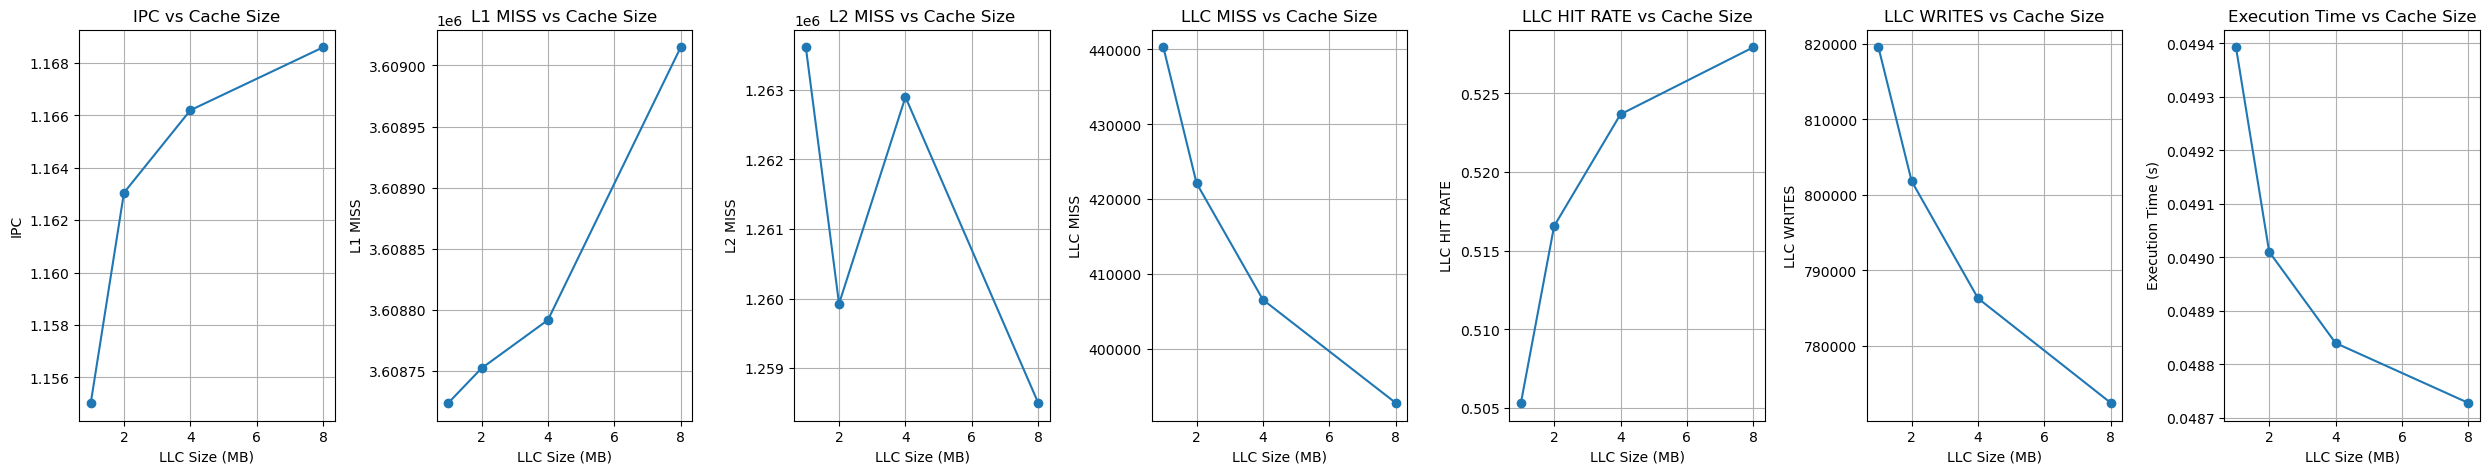

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
cache_size = [1, 2, 4, 8]  # Cache size in MB
ipc = [1.155029923, 1.163043769, 1.166189538, 1.168588923]
l1_miss = [3608723.538, 3608751.923, 3608791.462, 3609014.923]
l2_miss = [1263612.385, 1259925.692, 1262897.308, 1258499.846]
llc_miss = [440288.5385, 422121.9231, 406550.5385, 392766.9231]
llc_hit_rate = [0.5053291538, 0.516563, 0.5236671538, 0.5279243846]
llc_writes = [819568.3846, 801824.7692, 786297.1538, 772442.0769]
execution_time = [0.04939282308, 0.04901031538, 0.04883973846, 0.04872771538]

# Prepare subplots - 1 row, 7 columns
fig, axs = plt.subplots(1, 7, figsize=(25, 5))

# List of data and labels to plot
data = [
    (ipc, 'IPC', 'IPC vs Cache Size'),
    (l1_miss, 'L1 MISS', 'L1 MISS vs Cache Size'),
    (l2_miss, 'L2 MISS', 'L2 MISS vs Cache Size'),
    (llc_miss, 'LLC MISS', 'LLC MISS vs Cache Size'),
    (llc_hit_rate, 'LLC HIT RATE', 'LLC HIT RATE vs Cache Size'),
    (llc_writes, 'LLC WRITES', 'LLC WRITES vs Cache Size'),
    (execution_time, 'Execution Time (s)', 'Execution Time vs Cache Size')
]

# Plot each variable in the respective subplot
for i, (y, ylabel, title) in enumerate(data):
    axs[i].plot(cache_size, y, marker='o')
    axs[i].set_xlabel('LLC Size (MB)')
    axs[i].set_ylabel(ylabel)
    axs[i].set_title(title)
    axs[i].grid(True)

# Adjust layout to fit all plots
plt.tight_layout()
plt.show()